<img src='new_img/odsc.png'>

#   Keeping up with the Deep-Learning Curve via Keras
<img src='new_img/entree.png' align='middle'/>


# Recurrent Neural Nets


###  Snippet of a fully connected model
<img src='new_img/full_connect.png'/>

### Snippet of RNN
<img src='new_img/rnn3.jpg'/>

#### Our recurrence formula:
$s_t=f_W(s_{t-1},x_t)$
 
s_t=tanh(Whh(ht-1) + Wxh(xt))    

### Pseudo-code example:  RNN for text 'generation' 

In [ ]:
Vocab_size =1000 
hidden_layer=100

# U ~ 100x 1000
# V ~ 1000 x 100
# W ~ 100 x 100 

time_steps = 10   #  where time_steps are # of words in sample

# define our state matrix:
# s = 10 X 100

# output
# o = 1 x 1000

# given some word input, let's predict the next word 
for t in time_steps:
    #  U[x[t]   ~ essentially a look-up for U
    s[t]=np.tanh(np.dot(U,x[t]) + np.dot(W,s[t-1])) 
    o[t] = softmax(V.dot(s[t]))
                 
## during backprop, we continue to update each matrix: U,V,W


### RNN: Process Sequences

<img src='new_img/rnn_one.png'/>

- we have flexibility with the number of outputs/ inputs    
oTm : image to captioning      
mTo: sentence to sentiment      
mTm: videos to captioning // translation Eng to French (variable length on input / output )    
mTm: classification decision for every frame ?     

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Reshape, Activation, Bidirectional,\
     SimpleRNN, GRU, LSTM, Convolution1D, MaxPooling1D, Merge, Dropout, Convolution2D
from keras.optimizers import SGD, RMSprop, Adam
from keras.utils.np_utils import to_categorical
from IPython.display import SVG

from keras.datasets import imdb, reuters 
from keras.preprocessing import sequence
from keras.utils.vis_utils import model_to_dot, plot_model

import keras
import pandas as pd

import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np

## RNN Example: Text Classification

- We'll work with reuter newswire to classification dataset.   
- 46 classes
- We will model this using RNNs, but first let's try with an ANN. 

#### Ex 1: Reuters newswire data via ANN



In [4]:
max_features=2000
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=max_features)
test=pd.DataFrame(X_train)
test.head()

# get a sence of length of a typicaly observation
test['len']=test[0].apply(lambda x: len(x))

test['max']=test[0].apply(lambda x: max(x))
test.describe()

,len,max
count,8982.000000,8982.000000
mean,145.539857,1635.191605
std,145.822248,424.364717
min,13.000000,86.000000
25%,60.000000,1506.000000
50%,95.000000,1809.000000
75%,179.000000,1938.000000
max,2376.000000,1999.000000


In [5]:
# restrict our vocabulary to the top 2000 most frequent words
max_features = 2000
(X_train, y_train), (X_test, y_test) = reuters.load_data(
    num_words=max_features)
maxlen = 150
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
nb_epoch = 20

In [9]:
# let's see how our data is returned
print(X_test[0])
print(y_test[0])

# ~ 46 labels 
np.unique(y_test)

[   0    0    0    0    0    1    4 1378    2    9  697    2  111    8   25
  109   29    2   11  150  244  364   33   30   30 1398  333    6    2  159
    9 1084  363   13    2   71    9    2   71  117    4  225   78  206   10
    9 1214    8    4  270    5    2    7  748   48    9    2    7  207 1451
  966 1864  793   97  133  336    7    4  493   98  273  104  284   25   39
  338   22  905  220    2  644   59   20    6  119   61   11   15   58  579
   26   10   67    7    4  738   98   43   88  333  722   12   20    6   19
  746   35   15   10    9 1214  855  129  783   21    4    2  244  364   51
   16  299  452   16  515    4   99   29    5    4  364  281   48   10    9
 1214   23  644   47   20  324   27   56    2    2    5  192  510   17   12]
3


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [10]:
# let's see what these #'s translate to?! 
word_index = reuters.get_word_index(path="reuters_word_index.json")

ind_2_word={v: k for k, v in word_index.items()}

print([ind_2_word[i] for i in X_test[0] if i !=0])
print('\n')


['the', 'in', 'wants', 'of', '3', 'how', 'of', 'could', 'mln', 'at', 'against', '2', 'of', 'vs', 'end', 'products', 'opec', 'he', 'will', 'will', 'along', 'results', 'and', 'of', 'exports', '3', 'purchased', 'each', 'it', 'of', 'profit', '3', 'of', 'profit', 'agreement', 'in', 'around', 'corp', 'should', 'for', '3', 'cannot', 'mln', 'in', 'ended', 'said', 'of', 'a', '54', 'but', '3', 'of', 'a', 'only', 'generally', 'political', 'primarily', 'date', 'other', 'under', 'well', 'a', 'in', 'british', 'rate', 'gain', 'if', 'demand', 'at', 'an', 'div', 'its', 'taking', 'report', 'of', 'systems', 'were', 'is', 'and', 'production', 'had', 'vs', '000', '7', 'issued', 'year', 'for', '0', 'a', 'in', 'buffer', 'rate', 'loss', 'may', 'results', 'tariffs', 'dlrs', 'is', 'and', 'from', '39', 's', '000', 'for', '3', 'cannot', 'pre', '50', 'east', 'that', 'in', 'of', 'products', 'opec', 'last', '1', 'fall', 'change', '1', 'approval', 'in', '15', '2', 'said', 'in', 'opec', '28', 'but', 'for', '3', 'canno

In [11]:
# Develop ANN Model

model = Sequential()

model.add(Dense(64, input_dim=150, kernel_initializer='uniform'))
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(64, kernel_initializer='uniform'))
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(46, kernel_initializer='uniform'))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

cb=keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')
fit1 = model.fit(X_train, y_train,
          epochs=20, callbacks=[cb],
          batch_size=32,validation_data=[X_test, y_test])


Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 1s 151us/step - loss: 2.4977 - acc: 0.3457 - val_loss: 2.3644 - val_acc: 0.3762
Epoch 2/20
8982/8982 [==============================] - 1s 134us/step - loss: 2.3779 - acc: 0.3629 - val_loss: 2.3257 - val_acc: 0.3731
Epoch 3/20
8982/8982 [==============================] - 1s 135us/step - loss: 2.3718 - acc: 0.3664 - val_loss: 2.3271 - val_acc: 0.3758
Epoch 4/20
8982/8982 [==============================] - 1s 135us/step - loss: 2.3666 - acc: 0.3654 - val_loss: 2.3204 - val_acc: 0.3780
Epoch 5/20
8982/8982 [==============================] - 1s 135us/step - loss: 2.3717 - acc: 0.3629 - val_loss: 2.3254 - val_acc: 0.3749
Epoch 6/20
8982/8982 [==============================] - 1s 130us/step - loss: 2.3724 - acc: 0.3661 - val_loss: 2.3387 - val_acc: 0.3727


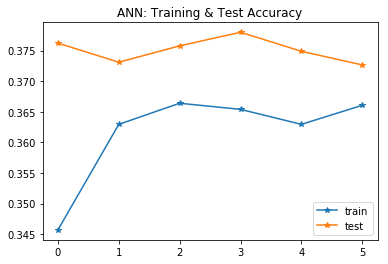

In [12]:

plt.plot(range(6),fit1.history['acc'],marker='*',label='train')
plt.plot(range(6),fit1.history['val_acc'],marker='*',label='test')
plt.title('ANN: Training & Test Accuracy')
plt.legend();


### Thoughts ? 

#### Ex 2: Reuters newswire data via RNN

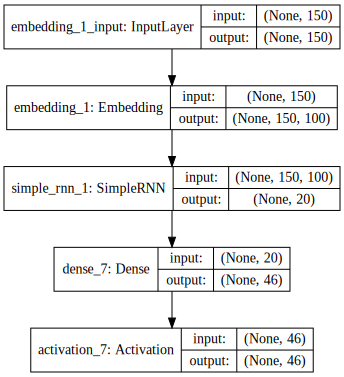

In [13]:
# Create the model
model = Sequential()

# what is this Embedding Layer ? 
model.add(Embedding(input_dim=max_features, output_dim=100, embeddings_initializer="glorot_uniform", input_length=maxlen))
# This is the most basic kind of RNN!  We're using 20 units, 
# which somewhat reflects our "memory" of past events in a sequence
model.add(SimpleRNN(20, return_sequences=False))
model.add(Dense(46))  # number of classes
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [14]:
cb=keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

fit2=model.fit(X_train,y_train,epochs=20,
         validation_data=(X_test,y_test),callbacks=[cb])

Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 45s 5ms/step - loss: 2.5255 - acc: 0.3519 - val_loss: 2.2742 - val_acc: 0.4061
Epoch 2/20
8982/8982 [==============================] - 40s 4ms/step - loss: 2.1623 - acc: 0.4413 - val_loss: 2.0829 - val_acc: 0.4506
Epoch 3/20
8982/8982 [==============================] - 42s 5ms/step - loss: 1.8983 - acc: 0.4957 - val_loss: 1.9062 - val_acc: 0.4777
Epoch 4/20
8982/8982 [==============================] - 41s 5ms/step - loss: 1.7623 - acc: 0.5306 - val_loss: 1.8759 - val_acc: 0.4880
Epoch 5/20
8982/8982 [==============================] - 42s 5ms/step - loss: 1.6672 - acc: 0.5612 - val_loss: 1.8632 - val_acc: 0.4938
Epoch 6/20
8982/8982 [==============================] - 41s 5ms/step - loss: 1.5869 - acc: 0.5893 - val_loss: 1.8853 - val_acc: 0.4871
Epoch 7/20
8982/8982 [==============================] - 41s 5ms/step - loss: 1.5064 - acc: 0.6129 - val_loss: 1.9202 - val_acc: 0.4964


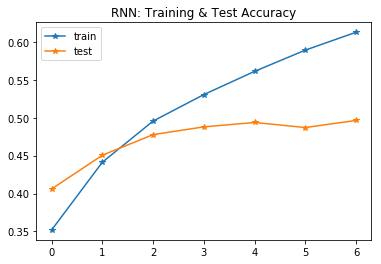

In [15]:
plt.plot(range(7),fit2.history['acc'],marker='*',label='train')
plt.plot(range(7),fit2.history['val_acc'],marker='*',label='test')
plt.title('RNN: Training & Test Accuracy')
plt.legend();


## Thoughts here ?
- Let's improve ! 

### LSTM  - Long Short Term Memory

<img src='new_img/lstm_3_anno.png'/>
<img src='new_img/lstm_eqn.png'/>

[credits: Colah's Blog](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)

#### Ex 3: Reuters newswire via LSTM



1) Run the following LSTM model.     
- We see a moderate improvement from our RNN model.  How can we improve this further? 

Hints: 
* Adjust # of memory units
* Compare & contrast different optimizers
* Shit-tab to read LSTM & Embedding DocStrings.  Experiment with other arguments.

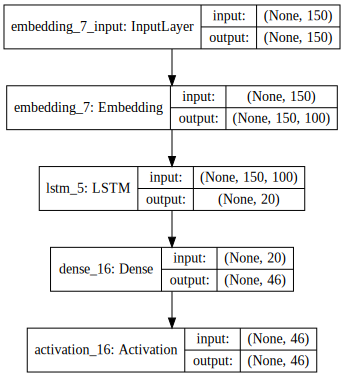

In [50]:
# 1st run through, LSTM 
model = Sequential()

model.add(Embedding(input_dim=max_features, output_dim=100, embeddings_initializer="glorot_uniform", input_length=maxlen))

model.add(LSTM(20, return_sequences=False)) # again 20 'memory' units
model.add(Dense(46))  # number of classes
model.add(Activation('softmax'))

np.random.seed(123)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [52]:
# hmmm .. let's introduce reduceonplateau
cb1=keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
cb2=keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=0, mode='auto', cooldown=0, min_lr=0)


fit3=model.fit(X_train,y_train,epochs=20,
         validation_data=(X_test,y_test),callbacks=[cb1,cb2])

Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 169s 19ms/step - loss: 2.0728 - acc: 0.4188 - val_loss: 1.8157 - val_acc: 0.5450
Epoch 2/20
8982/8982 [==============================] - 165s 18ms/step - loss: 1.7248 - acc: 0.5569 - val_loss: 1.7277 - val_acc: 0.5708
Epoch 3/20
8982/8982 [==============================] - 164s 18ms/step - loss: 1.6102 - acc: 0.5877 - val_loss: 1.6130 - val_acc: 0.5748
Epoch 4/20
8982/8982 [==============================] - 148s 17ms/step - loss: 1.5174 - acc: 0.6075 - val_loss: 1.5487 - val_acc: 0.6015
Epoch 5/20
8982/8982 [==============================] - 150s 17ms/step - loss: 1.4400 - acc: 0.6357 - val_loss: 1.6001 - val_acc: 0.5886
Epoch 6/20
8982/8982 [==============================] - 149s 17ms/step - loss: 1.3586 - acc: 0.6656 - val_loss: 1.4965 - val_acc: 0.6296
Epoch 7/20
8982/8982 [==============================] - 155s 17ms/step - loss: 1.2734 - acc: 0.6868 - val_loss: 1.4754 - val_acc: 

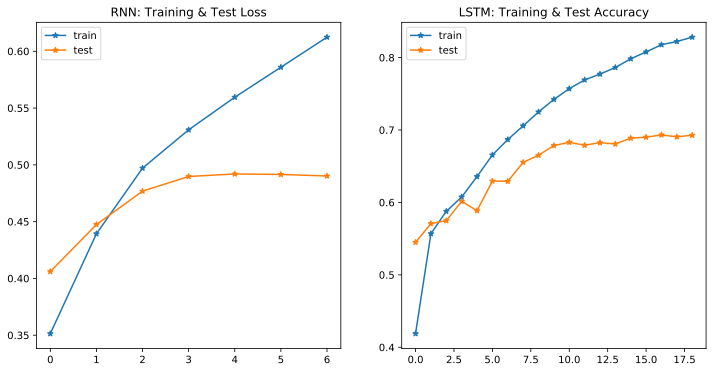

In [91]:
### LSTM vs RNN

# visualize training process 
fig,ax=plt.subplots(1,2,figsize=(12,6))

ax[0].plot(range(len(fit2.history['acc'])),fit2.history['acc'],marker='*',label='train')
ax[0].plot(range(len(fit2.history['acc'])),fit2.history['val_acc'],marker='*',label='test')
ax[0].set_title('RNN: Training & Test Loss')
ax[0].legend();


ax[1].plot(range(len(fit3.history['acc'])),fit3.history['acc'],marker='*',label='train')
ax[1].plot(range(len(fit3.history['acc'])),fit3.history['val_acc'],marker='*',label='test')
ax[1].set_title('LSTM: Training & Test Accuracy')
ax[1].legend();

In [65]:
# add pretrained Embedding 

# create an embeddings index for glove 

embeddings_index = {}
f = open('/Users/julialintern/Downloads/glove/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [66]:
EMBEDDING_DIM=100

embedding_matrix = np.zeros(shape=(max_features, EMBEDDING_DIM))
for word, i in enumerate(word_index):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [67]:
# for example: 
embeddings_index.get('president')

array([-0.064549  , -0.13812   ,  0.50016999,  0.41433999,  0.45831999,
       -0.048331  , -0.21651   ,  0.34987   , -0.83235002, -0.62282002,
       -0.40099001, -0.31977999,  0.42928001, -0.026035  , -0.16170999,
       -0.32512999,  0.77604002, -0.39851999, -0.67013001, -0.55875999,
       -0.39862999, -0.28143001,  0.68614   ,  0.29229   , -0.71460003,
        0.36995   , -0.45309001, -0.23193   ,  0.76915997, -0.031589  ,
        1.06029999,  1.54460001, -0.13271999,  0.33701   , -0.97561002,
        0.73616999,  0.60841   ,  0.55800003, -0.39274001,  0.1121    ,
       -1.0474    , -0.03692   ,  0.99908   , -0.044925  , -0.41185999,
        0.19605   ,  0.093281  , -0.59622997, -0.60764998, -0.47420001,
       -0.30162001, -0.70128   , -0.20055   ,  0.99519002,  0.20088001,
       -2.56360006, -0.14627001,  0.77824003,  1.49129999,  0.29723999,
       -0.12084   , -0.060082  ,  0.079881  , -0.38348001,  0.41371   ,
       -0.41284001,  0.61702001,  1.13160002, -0.047434  ,  0.28

In [ ]:
# nice !! 

In [70]:
# 2nd run through, LSTM: let's refine a bit further ?! 
model = Sequential()

# 1) add pretrained embeddings
model.add(Embedding(input_dim=max_features, output_dim=100,  weights=[embedding_matrix], embeddings_initializer="glorot_uniform", input_length=maxlen))

# 2) crank up LSTM memory
model.add(LSTM(100, return_sequences=False)) 
model.add(Dense(46))  # number of classes
model.add(Activation('softmax'))

np.random.seed(123)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',  # changed optimizer to adam; can help with faster convergence
              metrics=['accuracy'])

In [71]:
cb1=keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
cb2=keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=0, mode='auto', cooldown=0, min_lr=0)

fit4=model.fit(X_train,y_train,epochs=20,
         validation_data=(X_test,y_test),callbacks=[cb])

Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 180s 20ms/step - loss: 2.2682 - acc: 0.4161 - val_loss: 1.9975 - val_acc: 0.4929
Epoch 2/20
8982/8982 [==============================] - 171s 19ms/step - loss: 1.8081 - acc: 0.5251 - val_loss: 2.2329 - val_acc: 0.3678
Epoch 3/20
8982/8982 [==============================] - 177s 20ms/step - loss: 1.7064 - acc: 0.5603 - val_loss: 1.6668 - val_acc: 0.5784
Epoch 4/20
8982/8982 [==============================] - 179s 20ms/step - loss: 1.5151 - acc: 0.6190 - val_loss: 1.5740 - val_acc: 0.6033
Epoch 5/20
8982/8982 [==============================] - 171s 19ms/step - loss: 1.4107 - acc: 0.6458 - val_loss: 1.4589 - val_acc: 0.6322
Epoch 6/20
8982/8982 [==============================] - 169s 19ms/step - loss: 1.3359 - acc: 0.6648 - val_loss: 1.4200 - val_acc: 0.6478
Epoch 7/20
8982/8982 [==============================] - 166s 19ms/step - loss: 1.2338 - acc: 0.6899 - val_loss: 1.3563 - val_acc: 

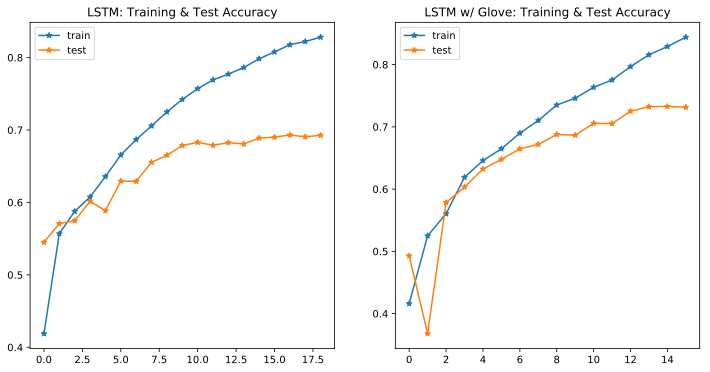

In [92]:
# LSTM 1 vs LSTM2
fig,ax=plt.subplots(1,2,figsize=(12,6))

ax[0].plot(range(len(fit3.history['acc'])),fit3.history['acc'],marker='*',label='train')
ax[0].plot(range(len(fit3.history['acc'])),fit3.history['val_acc'],marker='*',label='test')
ax[0].set_title('LSTM: Training & Test Accuracy')
ax[0].legend();


ax[1].plot(range(len(fit4.history['acc'])),fit4.history['acc'],marker='*',label='train')
ax[1].plot(range(len(fit4.history['acc'])),fit4.history['val_acc'],marker='*',label='test')
ax[1].set_title('LSTM w/ Glove: Training & Test Accuracy')
ax[1].legend();

###   Code-Along: 
Try to reduce overfitting by adding Dropout to the the architecture 

In [77]:
# enter your code here ! 

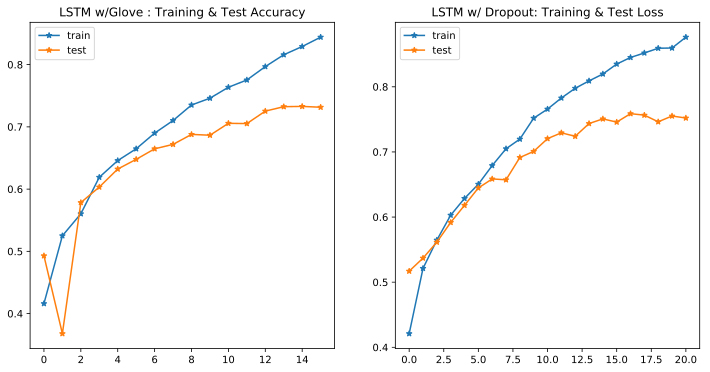

In [79]:
# LSTM2 vs LSTM3
fig,ax=plt.subplots(1,2,figsize=(12,6))

ax[0].plot(range(len(fit4.history['acc'])),fit4.history['acc'],marker='*',label='train')
ax[0].plot(range(len(fit4.history['acc'])),fit4.history['val_acc'],marker='*',label='test')
ax[0].set_title('LSTM w/Glove : Training & Test Accuracy')
ax[0].legend();


ax[1].plot(range(len(fit5.history['acc'])),fit5.history['acc'],marker='*',label='train')
ax[1].plot(range(len(fit5.history['acc'])),fit5.history['val_acc'],marker='*',label='test')
ax[1].set_title('LSTM w/ Dropout: Training & Test Loss')
ax[1].legend();

In [ ]:
# note about train vs test, we want to try to cross the threshold --> then peel back,